In [17]:
#!pip install autoimpute

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import seaborn as sns

from autoimpute.utils import md_pattern, proportions
from autoimpute.visuals import plot_md_locations, plot_md_percent
from autoimpute.visuals import plot_imp_dists, plot_imp_boxplots
from autoimpute.visuals import plot_imp_swarm
from autoimpute.imputations import MultipleImputer

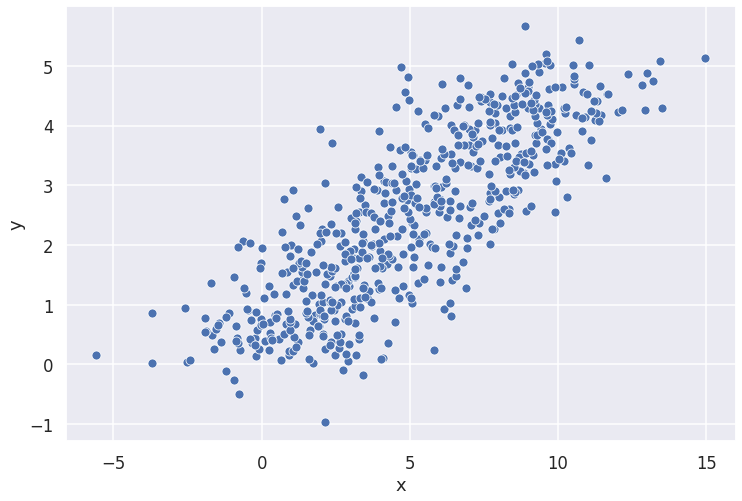

In [16]:
# seed to follow along
np.random.seed(1234)

# generate 1000 data points
N = np.arange(1000)

# helper function for this data
vary = lambda v: np.random.choice(np.arange(v))

# create correlated, random variables
a = 2
b = 1/2
eps = np.array([norm(0, vary(50)).rvs() for n in N])
y = (a + b*N + eps) / 100                         
x = (N + norm(10, vary(250)).rvs(len(N))) / 100
 
# add missing values
y[binom(1, 0.4).rvs(len(N)) == 1] = np.nan

#convert to dataframe
df = pd.DataFrame({"y": y, "x": x})

#plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x="x", y="y", data=df)
plt.show()

Missingness EDA

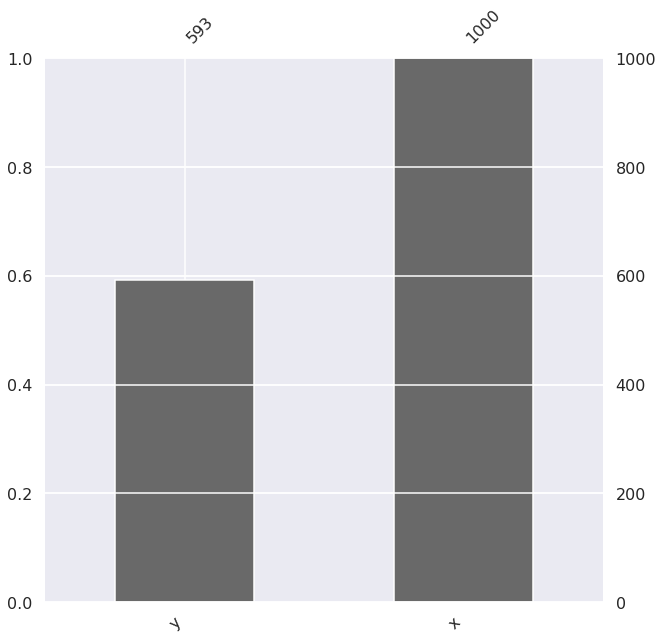

In [5]:
plot_md_percent(df, figsize=(10,10))

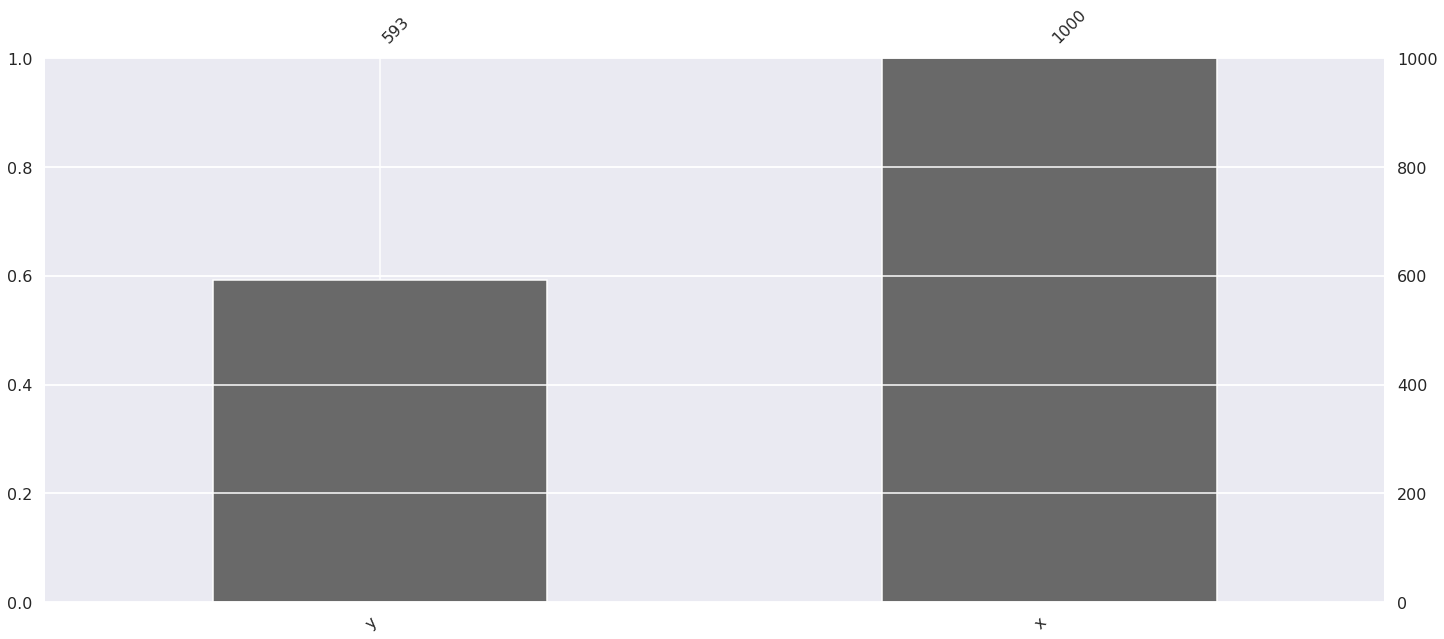

In [6]:
plot_md_percent(df)

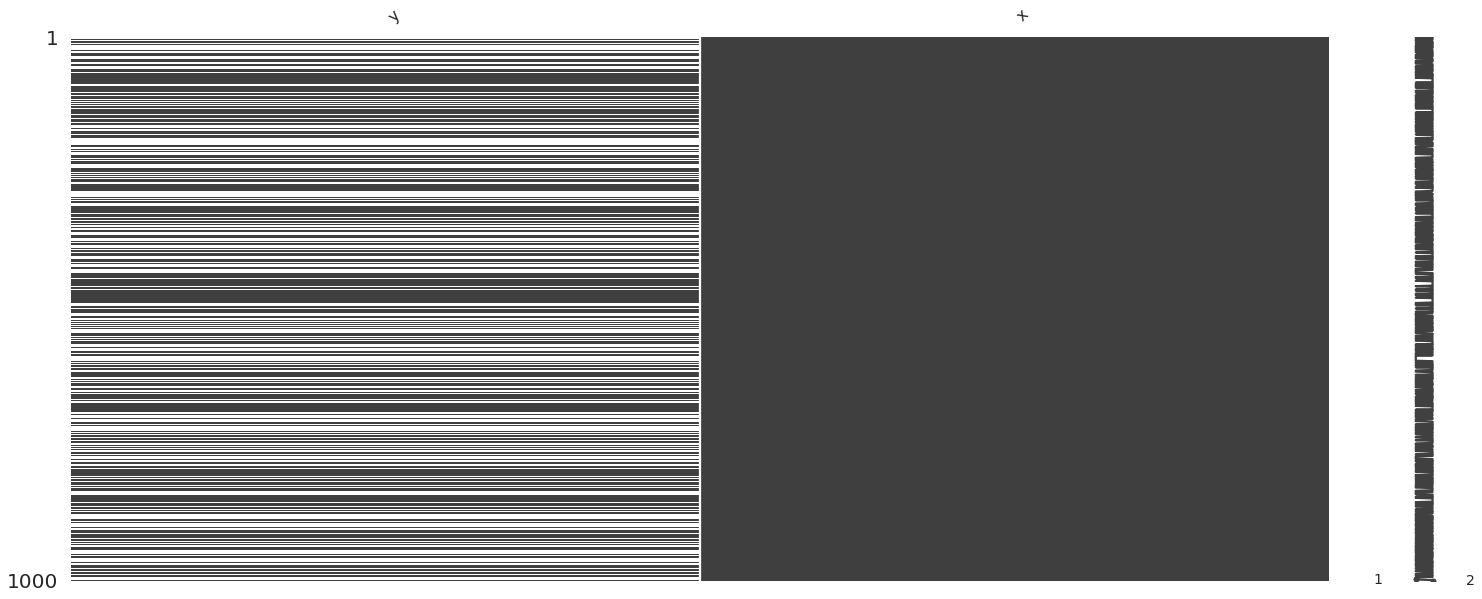

In [7]:
plot_md_locations(df)

Mean Imputation

In [8]:
mi_mean = MultipleImputer(
    strategy="mean", n=5, return_list=True, seed=101
)

# print the mean imputer to console
print(mi_mean)

# perform mean imputation procedure
imp_mean = mi_mean.fit_transform(df)

MultipleImputer(imp_kwgs=None, n=5, predictors='all', return_list=True,
                seed=101, strategy='mean', visit='default')


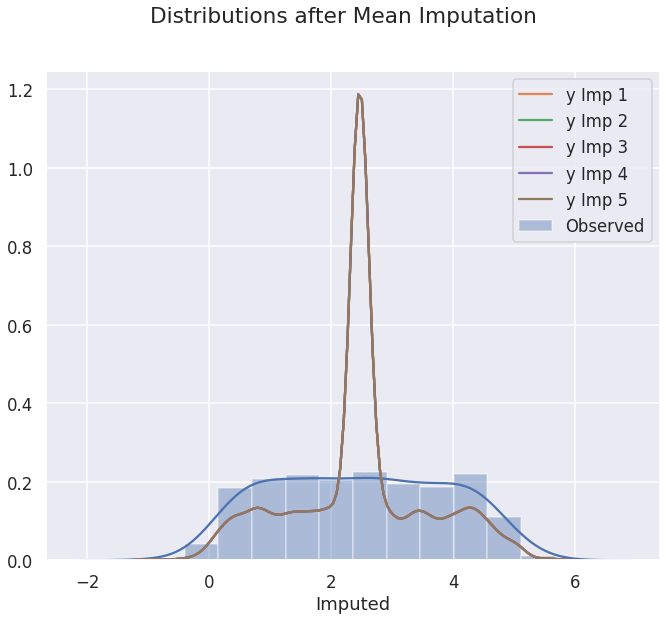

In [9]:
# distribution plot for mean imputation
plot_imp_dists(
    d=imp_mean,
    mi=mi_mean, 
    imp_col="y",
    title="Distributions after Mean Imputation",
    separate_observed=False,
    hist_observed=True, 
    figsize=(11, 9)
)

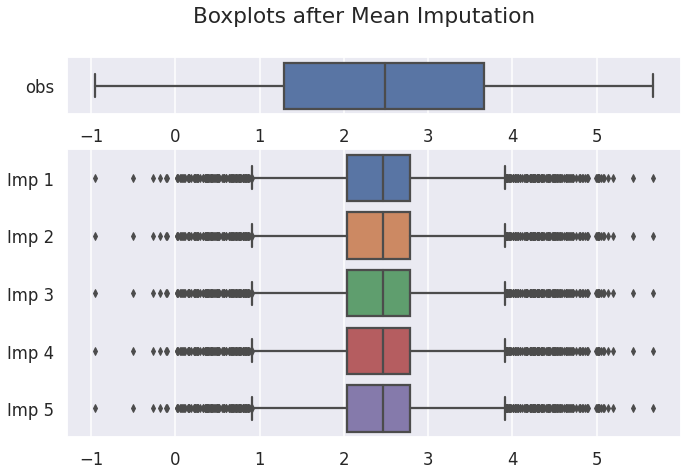

In [10]:
# box plot for mean imputation
plot_imp_boxplots(
    d=imp_mean,
    mi=mi_mean,
    imp_col="y",
    title="Boxplots after Mean Imputation", 
    figsize=(11, 7)
)

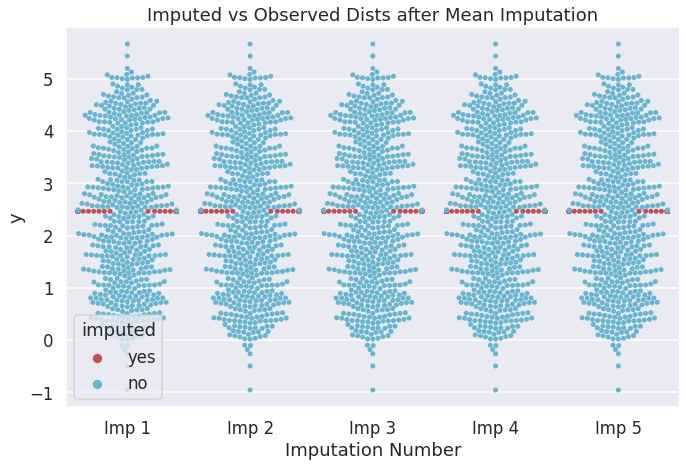

In [11]:
# swarm plot for mean imputation
plot_imp_swarm(
    d=imp_mean,
    mi=mi_mean,
    imp_col="y",
    title="Imputed vs Observed Dists after Mean Imputation", 
    figsize=(11, 7)
)

PMM Imputation

In [12]:
# create the PMM imputer
mi_pmm = MultipleImputer(
    strategy="pmm", n=5, return_list=True, seed=101
)

# perform PMM imputation procedure
imp_pmm = mi_pmm.fit_transform(df)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '122' (I am process '702')
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Sequential sampling (2 chains in 1 job)
NUTS: [σ, beta, alpha]
100%|██████████| 2000/2000 [00:02<00:00, 700.82it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, beta, alpha]
100%|██████████| 2000/2000 [00:02<00:00, 746.79it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, beta, alpha]
100%|██████████| 2000/2000 [00:02<00:00, 756.45it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [σ, beta, alpha]
100

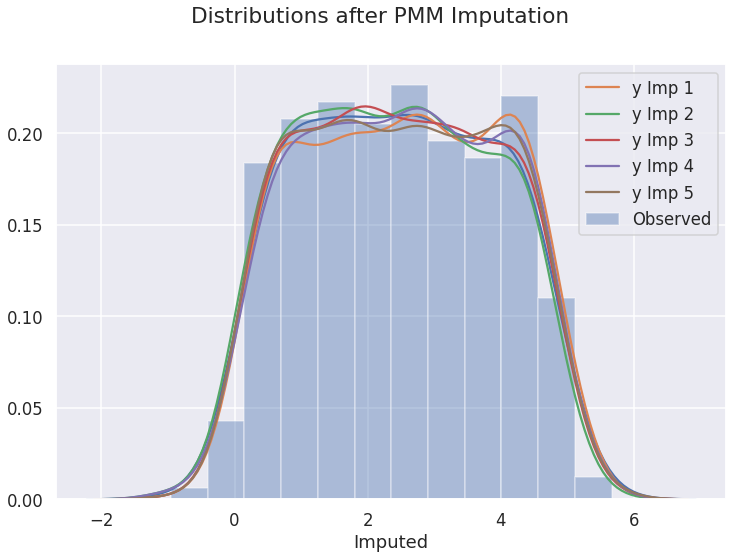

In [13]:
# distribution plot for PMM imputation
plot_imp_dists(
    d=imp_pmm,
    mi=mi_pmm, 
    imp_col="y",
    title="Distributions after PMM Imputation",
    separate_observed=False,
    hist_observed=True,
    hist_imputed=False
)

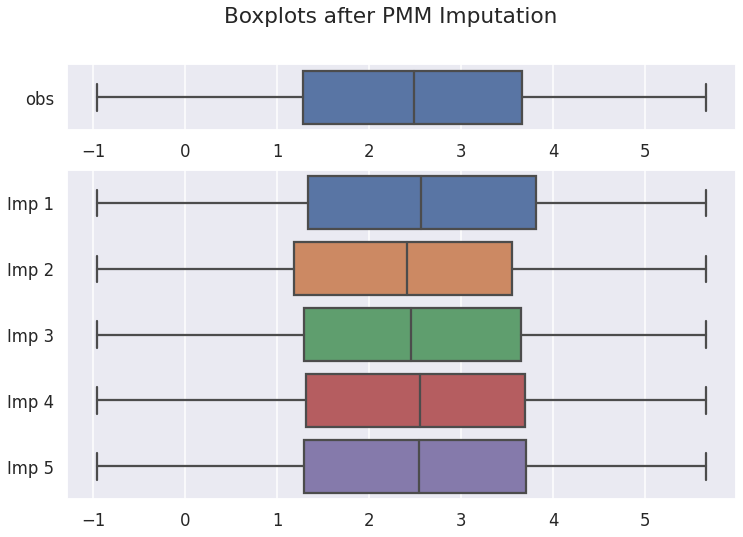

In [14]:
# box plot for PMM imputation
plot_imp_boxplots(
    d=imp_pmm,
    mi=mi_pmm,
    imp_col="y",
    title="Boxplots after PMM Imputation"
)

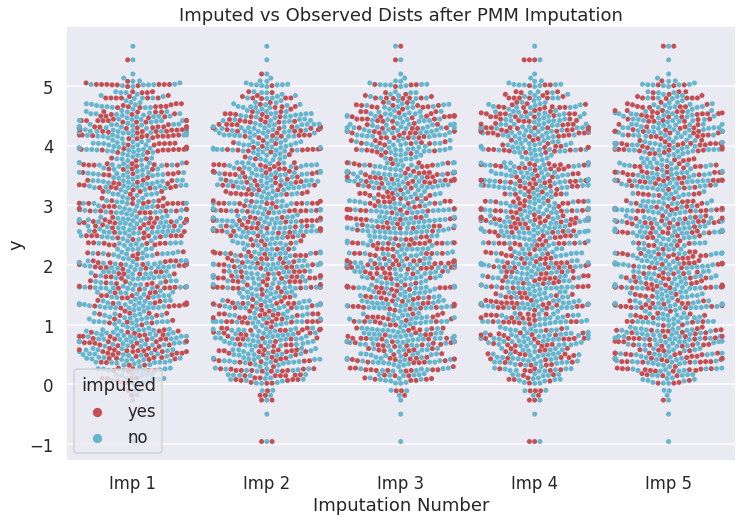

In [15]:
# swarm plot for PMM imputation
plot_imp_swarm(
    d=imp_pmm,
    mi=mi_pmm,
    imp_col="y",
    title="Imputed vs Observed Dists after PMM Imputation"
)